In [1]:

# 🌸 Iris Species Classification
# ===============================
# Goal: Build and evaluate a Decision Tree Classifier
# ===============================

# Step 1: Import libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [ ]:
# Step 2: Load dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
# Display first few rows
print("🔹 Sample Data:")
print(df.head(), "\n")

🔹 Sample Data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0   



In [4]:
# Step 3: Preprocessing
# Check for missing values
print("🔹 Missing Values:")
print(df.isnull().sum(), "\n")

# Encode target labels (already numeric in this dataset)
# If it were categorical, we’d use LabelEncoder.

🔹 Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64 



In [5]:
# Step 4: Split dataset
X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [6]:
# Step 5: Train Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [7]:
# Step 6: Make predictions
y_pred = model.predict(X_test)


In [8]:
# Step 7: Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("🔹 Model Performance:")
print(f"Accuracy:  {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}\n")

print("🔹 Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

🔹 Model Performance:
Accuracy:  0.93
Precision: 0.93
Recall:    0.93

🔹 Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



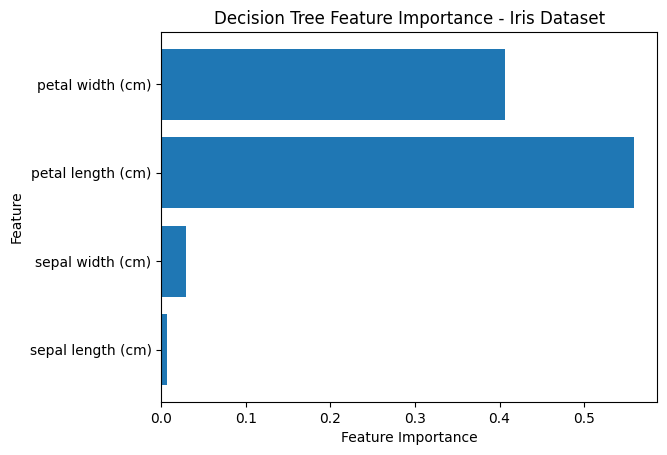

In [9]:
# Step 8: – Feature Importance
import matplotlib.pyplot as plt

importance = model.feature_importances_
plt.barh(iris.feature_names, importance)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Decision Tree Feature Importance - Iris Dataset")
plt.show()